Load the Dataset

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Random Forest Classifier

In [ ]:
import pandas as pd
import numpy as np


# Load dataset
df = pd.read_csv("/content/drive/MyDrive/amazon_reviews.csv")
df.head()


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


Exploratory Data Analytics

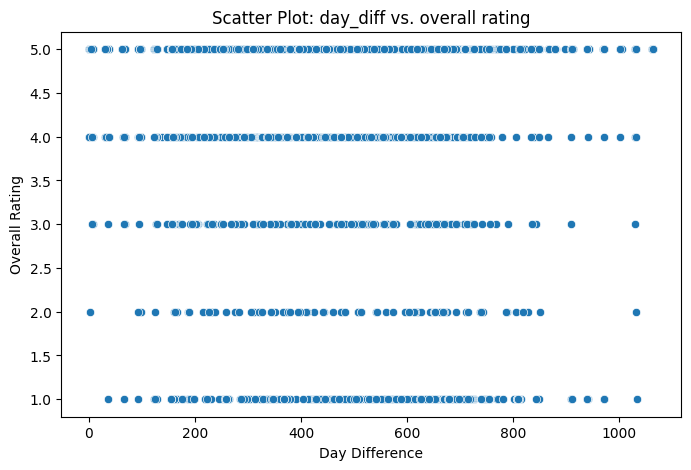

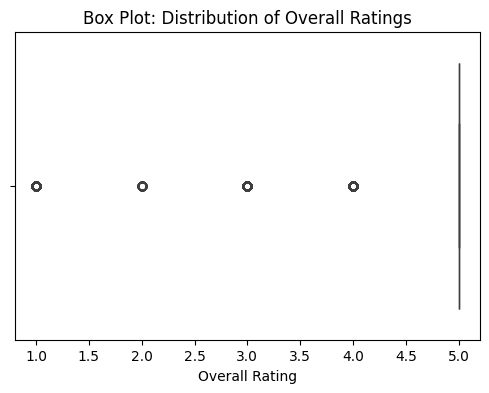

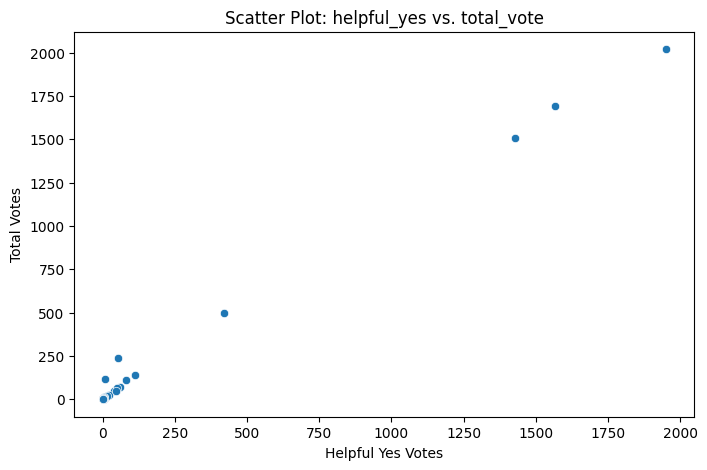

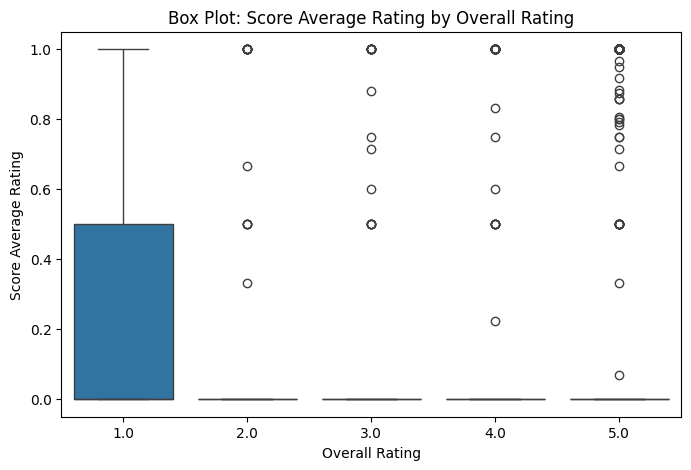

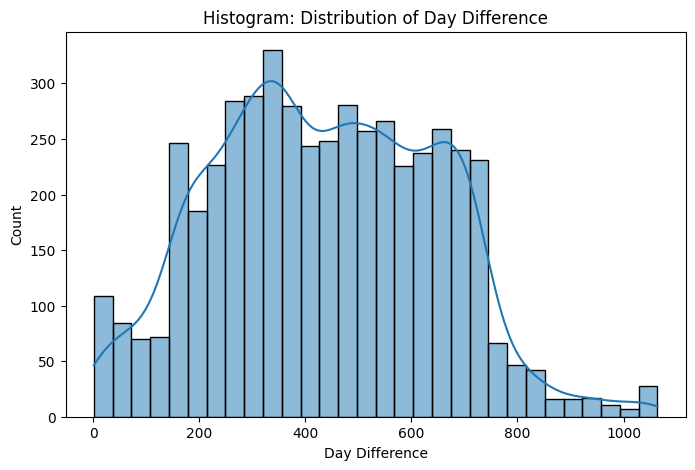

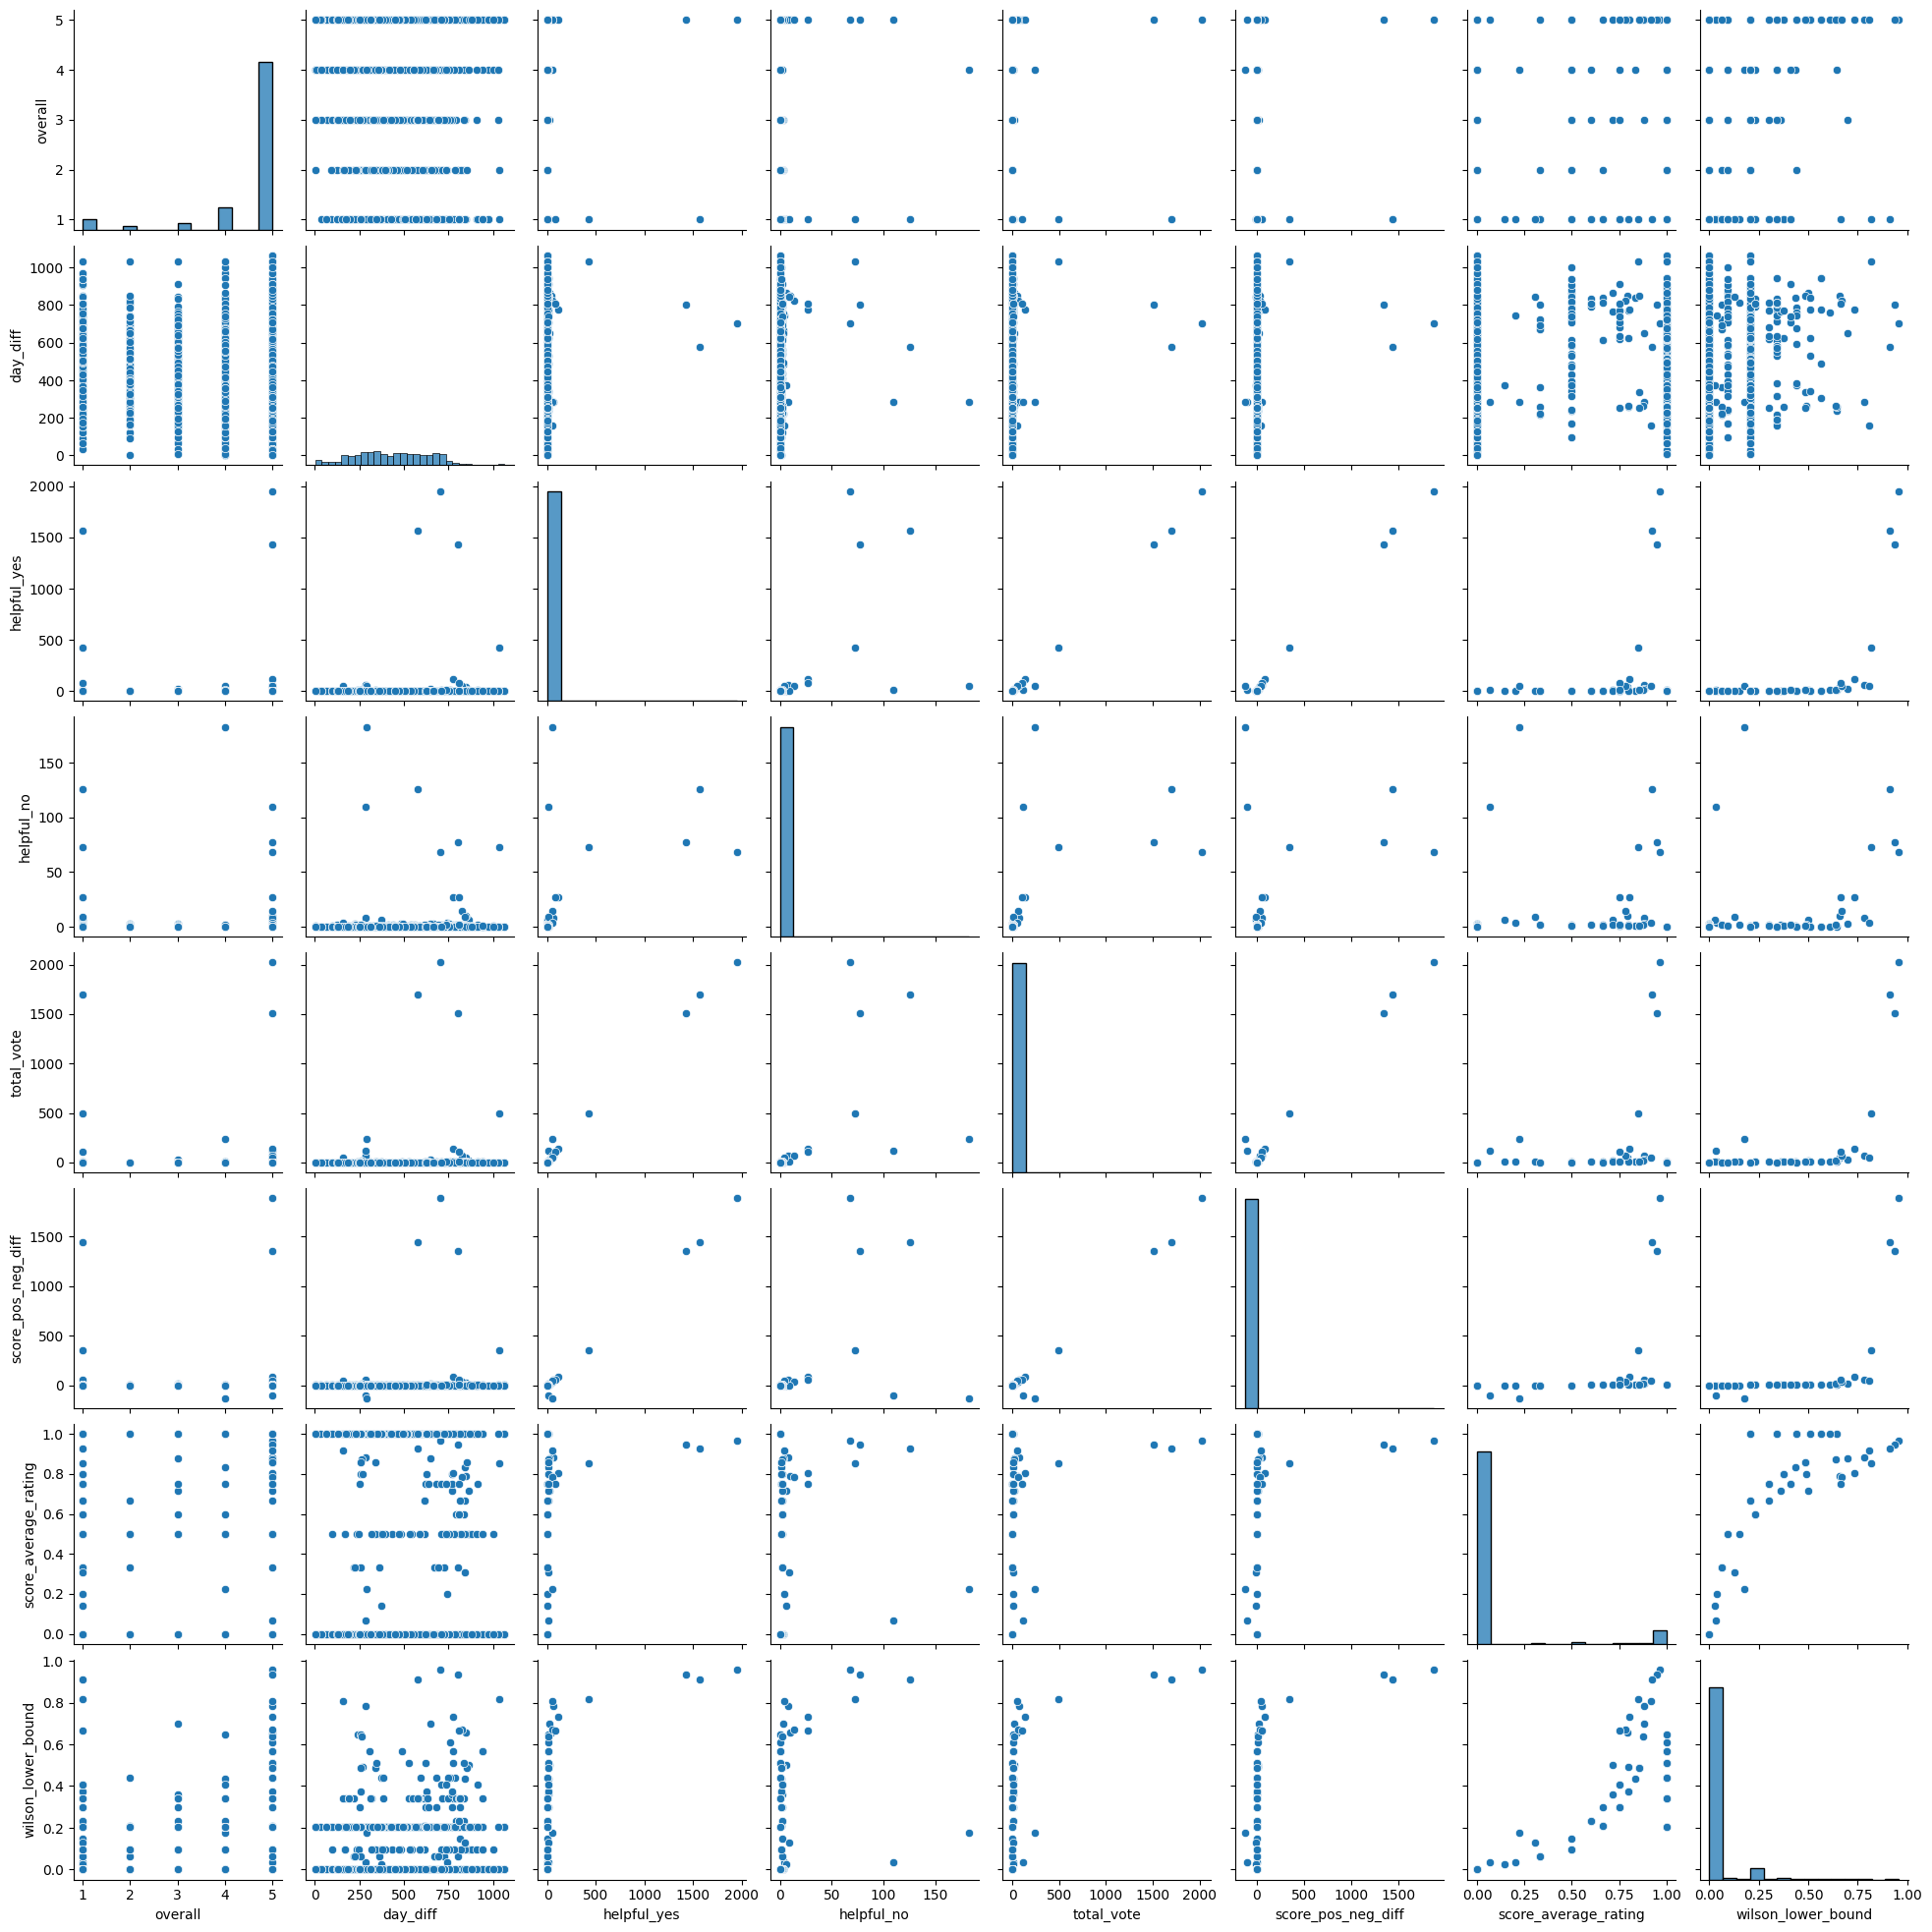

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: day_diff vs. overall rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['day_diff'], y=df['overall'])
plt.title('Scatter Plot: day_diff vs. overall rating')
plt.xlabel('Day Difference')
plt.ylabel('Overall Rating')
plt.show()

# Box Plot: Distribution of overall ratings
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['overall'])
plt.title('Box Plot: Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.show()

# Scatter Plot: helpful_yes vs. total_vote
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['helpful_yes'], y=df['total_vote'])
plt.title('Scatter Plot: helpful_yes vs. total_vote')
plt.xlabel('Helpful Yes Votes')
plt.ylabel('Total Votes')
plt.show()

# Box Plot: score_average_rating by overall rating
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['overall'], y=df['score_average_rating'])
plt.title('Box Plot: Score Average Rating by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Score Average Rating')
plt.show()

# Histogram: day_diff distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['day_diff'], bins=30, kde=True)
plt.title('Histogram: Distribution of Day Difference')
plt.xlabel('Day Difference')
plt.ylabel('Count')
plt.show()

# Pairplot for numerical features
sns.pairplot(df[['overall', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound']])
plt.show()




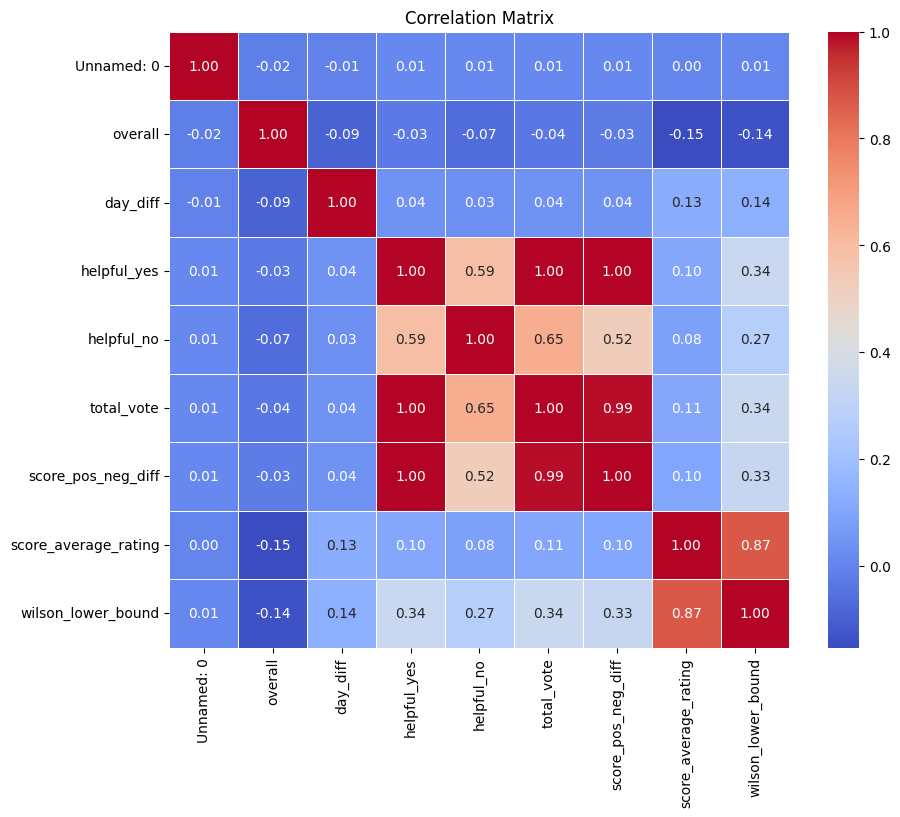

In [ ]:
# Correlation Matrix with Numeric Data Only
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['number']).corr()  # Select only numeric columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


PreProcessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/amazon_reviews.csv")

# Drop unnecessary columns
df.drop(columns=['reviewerName', 'reviewTime'], inplace=True)

# Handle missing values
df.fillna("", inplace=True)

# Convert text data (reviewText) to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['reviewText']).toarray()

# Encode categorical values
label_encoder = LabelEncoder()
df['overall'] = label_encoder.fit_transform(df['overall'])  # Encode overall rating

# Select numerical features
X_numeric = df[['day_diff', 'helpful_yes', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound']].values

# Scale numerical features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine text & numerical features
X = np.hstack((X_text, X_numeric_scaled))

# Target variable
y = df['overall']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("After Preprocessing:")
df.info()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   overall               4915 non-null   int64  
 2   reviewText            4915 non-null   object 
 3   day_diff              4915 non-null   int64  
 4   helpful_yes           4915 non-null   int64  
 5   helpful_no            4915 non-null   int64  
 6   total_vote            4915 non-null   int64  
 7   score_pos_neg_diff    4915 non-null   int64  
 8   score_average_rating  4915 non-null   float64
 9   wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 384.1+ KB
X_train shape: (3932, 506)
X_test shape: (983, 506)
y_train shape: (3932,)
y_test shape: (983,)


Random Forest Classifier

Random Forest - Accuracy: 0.79, Precision: 0.73, Recall: 0.32


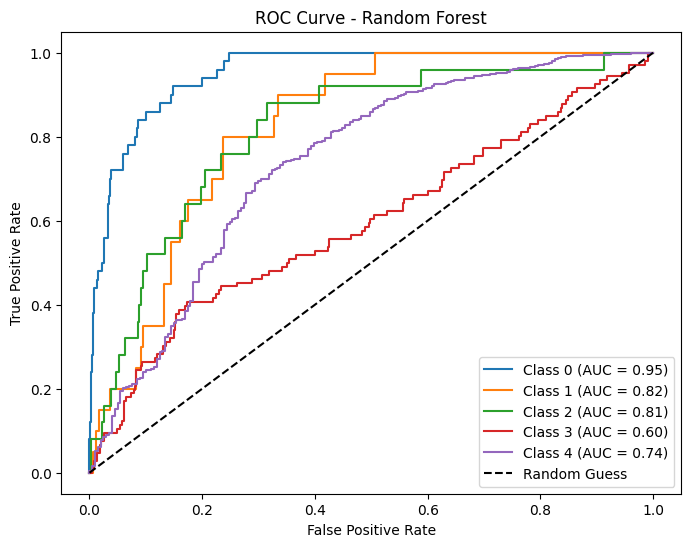

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        50
           1       1.00      0.00      0.00        20
           2       1.00      0.00      0.00        25
           3       0.27      0.15      0.19       106
           4       0.84      0.95      0.89       782

    accuracy                           0.79       983
   macro avg       0.73      0.32      0.32       983
weighted avg       0.77      0.79      0.76       983



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Random Forest model with optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate with zero_division set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}")

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_balanced))
y_score = rf_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()
from sklearn.metrics import classification_report

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Classification Report - Random Forest:\n", report_rf)




#DIMENSIONALITY REDUCTION


In [ ]:

from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (reduce to 100 components)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Split dataset again after PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (4915, 100)


APPLY SMOTE TO HANDLE THE CLASS IMBALANCE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Shape after SMOTE - X_train:", X_train_balanced.shape, "y_train:", y_train_balanced.shape)


Shape after SMOTE - X_train: (15700, 100) y_train: (15700,)


HYPER PARAMETER TUNING


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', None]
}

# Randomized Search for best parameters
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_balanced, y_train_balanced)

# Print best parameters
best_params = rf_random.best_params_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': None}


TRAIN THE OPTIMIZED RANDOM FOREST MODEL USING BEST PARAMETERS

In [ ]:

rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_rf_opt = rf_optimized.predict(X_test)

print("Optimized model training complete.")

Optimized model training complete.


 Model Evaluation (Accuracy, Precision, Recall, Classification Report)

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Evaluate optimized model
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
precision_rf_opt = precision_score(y_test, y_pred_rf_opt, average='macro', zero_division=1)
recall_rf_opt = recall_score(y_test, y_pred_rf_opt, average='macro', zero_division=1)

print(f"Optimized Random Forest - Accuracy: {accuracy_rf_opt:.2f}, Precision: {precision_rf_opt:.2f}, Recall: {recall_rf_opt:.2f}")

# Generate classification report
report_rf_opt = classification_report(y_test, y_pred_rf_opt, zero_division=1)
print("Classification Report - Optimized Random Forest:\n", report_rf_opt)


Optimized Random Forest - Accuracy: 0.80, Precision: 0.33, Recall: 0.30
Classification Report - Optimized Random Forest:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50        50
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        25
           3       0.29      0.07      0.11       106
           4       0.84      0.97      0.90       782

    accuracy                           0.80       983
   macro avg       0.33      0.30      0.30       983
weighted avg       0.72      0.80      0.75       983



Plot ROC Curve

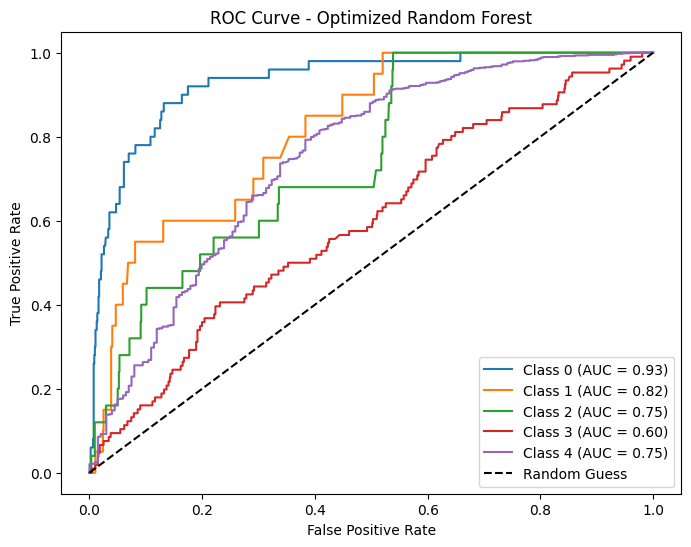

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_balanced))
y_score_opt = rf_optimized.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_opt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Random Forest')
plt.legend()
plt.show()


Compare Performance Before & After Optimization

In [ ]:
print("\nComparison of Performance Before and After Optimization:")
print(f"Before Optimization - Accuracy: 0.79, Precision: 0.53, Recall: 0.32")
print(f"After Optimization - Accuracy: {accuracy_rf_opt:.2f}, Precision: {precision_rf_opt:.2f}, Recall: {recall_rf_opt:.2f}")



Comparison of Performance Before and After Optimization:
Before Optimization - Accuracy: 0.79, Precision: 0.53, Recall: 0.32
After Optimization - Accuracy: 0.80, Precision: 0.33, Recall: 0.30


Support Vector Machine(SVM)

SVM - Accuracy: 0.75, Precision: 0.35, Recall: 0.37
Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.52      0.66      0.58        50
           1       0.10      0.05      0.07        20
           2       0.03      0.04      0.04        25
           3       0.22      0.23      0.22       106
           4       0.88      0.87      0.88       782

    accuracy                           0.75       983
   macro avg       0.35      0.37      0.36       983
weighted avg       0.75      0.75      0.75       983



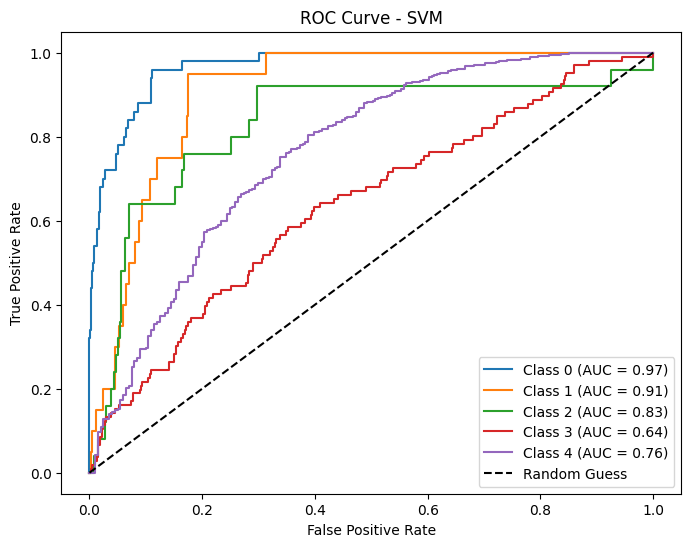

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train SVM model with class balancing
svm_model = SVC(kernel='rbf', C=1.5, class_weight='balanced', random_state=42, probability=True)
svm_model.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate with zero_division set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm, average='macro', zero_division=1)

print(f"SVM - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}")

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_balanced))
y_score = svm_model.predict_proba(X_test)
from sklearn.metrics import classification_report

# Generate classification report
report_svm = classification_report(y_test, y_pred_svm, zero_division=1)
print("Classification Report - SVM:\n", report_svm)
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()




DIMENSIONALITY REDUCTION (SVM)

In [ ]:

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions (keeping 100 principal components)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Split dataset again after PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Shape after PCA:", X_pca.shape)

Shape after PCA: (4915, 100)


Handle Class Imbalance using SMOTE(SVM)

In [ ]:

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Shape after SMOTE - X_train:", X_train_balanced.shape, "y_train:", y_train_balanced.shape)


Shape after SMOTE - X_train: (15700, 100) y_train: (15700,)


HYPERPARAMETER TUNING using RandomizedSearchCV

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define hyperparameter search space
param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # Kernel coefficient
}

# Randomized Search
svm_random = RandomizedSearchCV(
    SVC(class_weight='balanced', probability=True, random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

svm_random.fit(X_train_balanced, y_train_balanced)

# Print best parameters
best_params = svm_random.best_params_
print("Best Parameters for SVM:", best_params)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 10}


Train Final Optimized SVM Model

In [ ]:
# Train SVM using best parameters
svm_optimized = SVC(**best_params, class_weight='balanced', probability=True, random_state=42)
svm_optimized.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_svm_opt = svm_optimized.predict(X_test)

print("Optimized SVM Model training complete.")


Optimized SVM Model training complete.


Model Evaluation (Accuracy, Precision, Recall, Classification Report)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Evaluate optimized SVM model
accuracy_svm_opt = accuracy_score(y_test, y_pred_svm_opt)
precision_svm_opt = precision_score(y_test, y_pred_svm_opt, average='macro', zero_division=1)
recall_svm_opt = recall_score(y_test, y_pred_svm_opt, average='macro', zero_division=1)

print(f"Optimized SVM - Accuracy: {accuracy_svm_opt:.2f}, Precision: {precision_svm_opt:.2f}, Recall: {recall_svm_opt:.2f}")

# Generate classification report
report_svm_opt = classification_report(y_test, y_pred_svm_opt, zero_division=1)
print("Classification Report - Optimized SVM:\n", report_svm_opt)


Optimized SVM - Accuracy: 0.79, Precision: 0.40, Recall: 0.36
Classification Report - Optimized SVM:
               precision    recall  f1-score   support

           0       0.57      0.56      0.57        50
           1       0.10      0.05      0.07        20
           2       0.25      0.16      0.20        25
           3       0.24      0.10      0.15       106
           4       0.85      0.94      0.89       782

    accuracy                           0.79       983
   macro avg       0.40      0.36      0.37       983
weighted avg       0.74      0.79      0.76       983



Plot ROC Curve

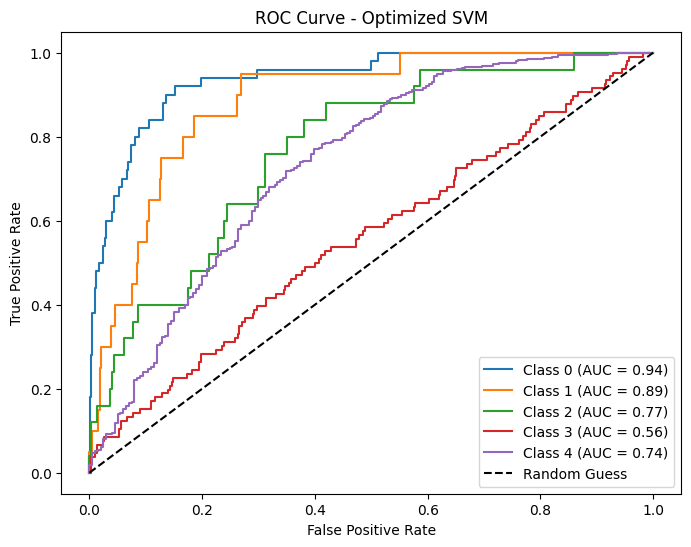

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_balanced))
y_score_opt = svm_optimized.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_opt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized SVM')
plt.legend()
plt.show()


Compare Performance Before & After Optimization

In [ ]:
print("\nComparison of Performance Before and After Optimization:")
print(f"Before Optimization - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}")
print(f"After Optimization - Accuracy: {accuracy_svm_opt:.2f}, Precision: {precision_svm_opt:.2f}, Recall: {recall_svm_opt:.2f}")



Comparison of Performance Before and After Optimization:
Before Optimization - Accuracy: 0.75, Precision: 0.35, Recall: 0.37
After Optimization - Accuracy: 0.79, Precision: 0.40, Recall: 0.36


Gradient Boosting

Gradient Boosting - Accuracy: 0.81, Precision: 0.46, Recall: 0.31


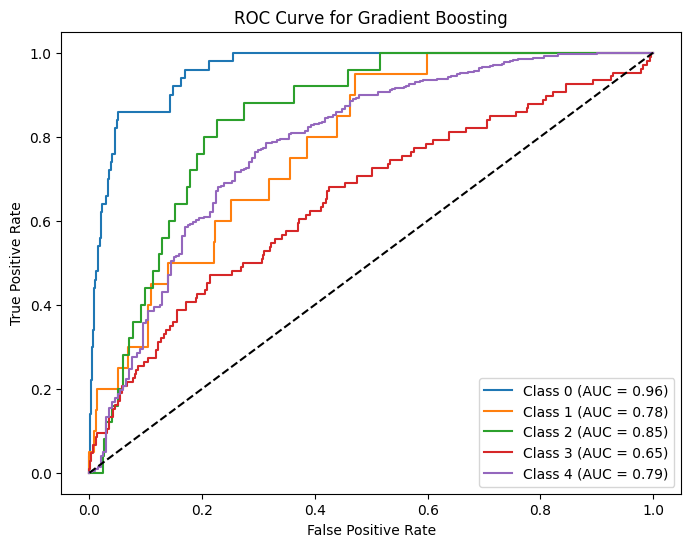

Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57        50
           1       0.33      0.05      0.09        20
           2       0.00      0.00      0.00        25
           3       0.38      0.05      0.08       106
           4       0.83      0.98      0.90       782

    accuracy                           0.81       983
   macro avg       0.46      0.31      0.33       983
weighted avg       0.75      0.81      0.76       983



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)  # Get probability scores

# Evaluate
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')

print(f"Gradient Boosting - Accuracy: {accuracy_gb:.2f}, Precision: {precision_gb:.2f}, Recall: {recall_gb:.2f}")

# ROC Curve
plt.figure(figsize=(8, 6))

# If binary classification
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba_gb[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')

# If multi-class classification
else:
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))  # Binarize labels
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_gb[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend()
plt.show()
# Generate classification report
report_gb = classification_report(y_test, y_pred_gb, zero_division=1)
print("Classification Report - Gradient Boosting:\n", report_gb)


KNN - Accuracy: 0.79, Precision: 0.36, Recall: 0.30


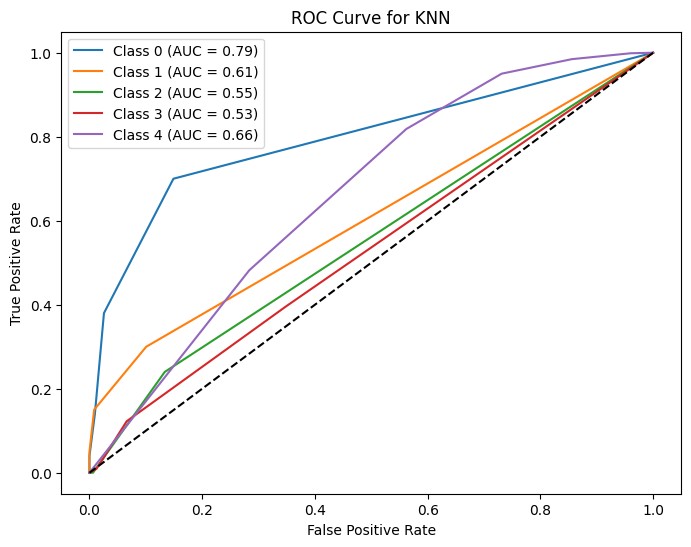

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        50
           1       0.33      0.15      0.21        20
           2       0.00      0.00      0.00        25
           3       0.12      0.04      0.06       106
           4       0.83      0.96      0.89       782

    accuracy                           0.79       983
   macro avg       0.36      0.30      0.32       983
weighted avg       0.71      0.79      0.74       983



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' for better performance
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)  # Get probability scores

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='macro', zero_division=1)

print(f"KNN - Accuracy: {accuracy_knn:.2f}, Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")

# ROC Curve
plt.figure(figsize=(8, 6))

# If binary classification
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba_knn[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')

# If multi-class classification
else:
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))  # Binarize labels
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()
from sklearn.metrics import classification_report
# Generate classification report
report_knn = classification_report(y_test, y_pred_knn, zero_division=1)
print("Classification Report - KNN:\n", report_knn)




HEMA'S KNN
WITH OPTIMIZATION

KNN - Accuracy: 0.97, Precision: 0.98, Recall: 0.97


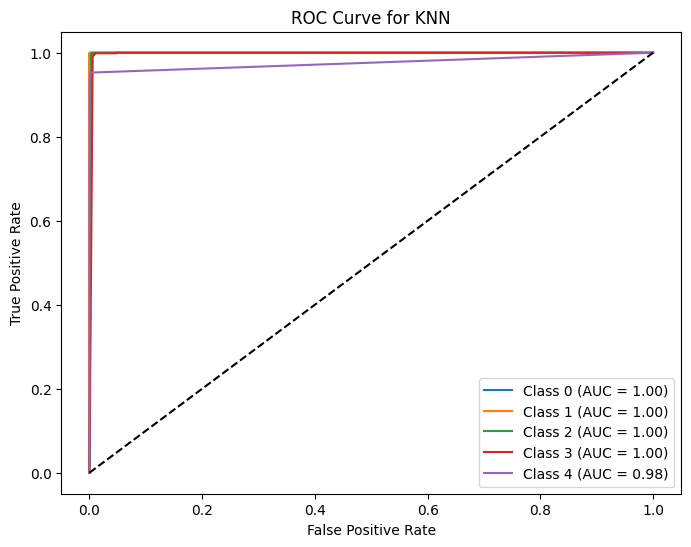

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       770
           1       0.99      1.00      1.00       807
           2       0.98      1.00      0.99       808
           3       0.92      1.00      0.96       752
           4       1.00      0.87      0.93       785

    accuracy                           0.97      3922
   macro avg       0.98      0.97      0.97      3922
weighted avg       0.98      0.97      0.97      3922

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# 1. Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 2. Apply PCA on numerical features
pca = PCA(n_components=5)
X_train_numeric = X_train[:, -6:]
X_test_numeric = X_test[:, -6:]

X_train_pca = pca.fit_transform(X_train_numeric)
X_test_pca = pca.transform(X_test_numeric)

# Combine PCA and text features
X_train_combined = np.hstack((X_train[:, :-6], X_train_pca))
X_test_combined = np.hstack((X_test[:, :-6], X_test_pca))

# 3. Hyperparameter Tuning using Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train_combined, y_train)

# Best model evaluation
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_combined)
y_proba_knn = best_knn.predict_proba(X_test_combined)

# 4. Evaluate Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='macro', zero_division=1)

print(f"KNN - Accuracy: {accuracy_knn:.2f}, Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")

# 5. ROC Curve
plt.figure(figsize=(8, 6))
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba_knn[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
else:
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# Classification Report
report_knn = classification_report(y_test, y_pred_knn, zero_division=1)
print("Classification Report - KNN:\n", report_knn)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


ENSEMBLE KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Use the preprocessed dataset
# X_train_combined, X_test_combined, y_train, y_test are already processed

# Define base models with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
#rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Apply Bagging
bagging_knn = BaggingClassifier(estimator=knn, n_estimators=10, random_state=42)
#bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)

# Train models
bagging_knn.fit(X_train_combined, y_train)
#bagging_rf.fit(X_train_combined, y_train)

# Predict
y_pred_knn = bagging_knn.predict(X_test_combined)
#y_pred_rf = bagging_rf.predict(X_test_combined)

# Evaluate KNN with Bagging
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='macro', zero_division=1)

print("\nBagging KNN Performance:")
print(f"Accuracy: {accuracy_knn:.2f}, Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")
print("Classification Report - Bagging KNN:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

# Evaluate Random Forest with Bagging
#accuracy_rf = accuracy_score(y_test, y_pred_rf)
#precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
#recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)




Bagging KNN Performance:
Accuracy: 0.98, Precision: 0.98, Recall: 0.98
Classification Report - Bagging KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       770
           1       0.99      1.00      1.00       807
           2       0.98      1.00      0.99       808
           3       0.92      1.00      0.96       752
           4       1.00      0.88      0.94       785

    accuracy                           0.98      3922
   macro avg       0.98      0.98      0.98      3922
weighted avg       0.98      0.98      0.98      3922


Bagging Random Forest Performance:
Accuracy: 0.97, Precision: 0.97, Recall: 0.97


PICKLE FILE CONVERSION OF KNN


In [ ]:
import pickle

# Save the Bagging KNN model
with open("bagging_knn.sav", "wb") as file:
    pickle.dump(bagging_knn, file)

print("Bagging KNN model saved as bagging_knn.sav")



Bagging KNN model saved as bagging_knn.pkl


In [ ]:
print(X_test_combined[:5])  # Show first 5 rows


[[ 0.04260457  0.          0.         ... -0.77163507  0.04492018
   0.00437676]
 [ 0.          0.          0.         ... -0.72249631 -0.53112538
  -0.00300377]
 [ 0.          0.          0.         ...  1.32204601 -0.01856846
  -0.003319  ]
 [ 0.          0.          0.         ...  1.19803957 -0.01538837
   0.00787132]
 [ 0.01587484  0.          0.         ...  0.24205601  0.01571918
  -0.02780265]]


In [ ]:
import pandas as pd

# Get TF-IDF feature names
tfidf_feature_names = tfidf.get_feature_names_out()  # From your TfidfVectorizer

# Create column names (TF-IDF features + PCA components)
num_pca_components = X_train_pca.shape[1]  # Number of PCA components
pca_feature_names = [f'PCA_{i+1}' for i in range(num_pca_components)]

# Combine all column names
final_column_names = list(tfidf_feature_names) + pca_feature_names

# Convert to DataFrame for better readability
df_X_train_combined = pd.DataFrame(X_train_combined, columns=final_column_names)

# Display column names
print("Columns in X_train_combined after ensemble:")
print(df_X_train_combined.columns)


Columns in X_train_combined after ensemble:
Index(['10', '1080p', '16', '16gb', '30', '32', '32gb', '34', '64', '64gb',
       ...
       'year', 'years', 'yet', 'you', 'your', 'PCA_1', 'PCA_2', 'PCA_3',
       'PCA_4', 'PCA_5'],
      dtype='object', length=505)


Load and Save the Model

In [ ]:
# Load the saved model
with open("bagging_knn.sav", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model for prediction
y_pred = loaded_model.predict(X_test_combined)

print("Model loaded successfully and ready for predictions!")


Model loaded successfully and ready for predictions!


In [ ]:
import pickle
with open('tfidf_vectorizer.sav', 'wb') as f:
    pickle.dump(tfidf, f)


In [ ]:
pickle.dump(scaler, open('scaler.sav', 'wb'))
